In [ ]:
print("tries after 50 accuracy")

tries after 50 accuracy


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Mar 13 17:46:14 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
import numpy as np

In [ ]:
print("tries after 50 accuracy")

tries after 50 accuracy


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Mar 13 17:46:14 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Importing the libraries
import numpy as np

import pandas as pd
import os
import cv2
import h5py
import tensorflow as tf

from keras.layers import TimeDistributed,Flatten
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D


from keras.layers import Dense,LSTM,Dropout
from tensorflow.keras.utils import Sequence


from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import plot_model

In [ ]:
#mounting google drive on colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !unzip '/content/drive/MyDrive/unseen_augmented_dataset.zip'
!unzip '/content/drive/MyDrive/upscaled_augmented_dataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: upscaled_augmented_dataset/train/10/F08_02_random_rotate/color_004.jpg  
  inflating: upscaled_augmented_dataset/train/10/F08_02_random_rotate/color_005.jpg  
  inflating: upscaled_augmented_dataset/train/10/F08_02_random_rotate/color_006.jpg  
  inflating: upscaled_augmented_dataset/train/10/F08_02_random_rotate/color_007.jpg  
  inflating: upscaled_augmented_dataset/train/10/F08_02_random_rotate/color_008.jpg  
  inflating: upscaled_augmented_dataset/train/10/F08_02_random_rotate/color_009.jpg  
  inflating: upscaled_augmented_dataset/train/10/F08_02_random_rotate/color_010.jpg  
   creating: upscaled_augmented_dataset/train/10/F08_02_random_translate/
  inflating: upscaled_augmented_dataset/train/10/F08_02_random_translate/color_001.jpg  
  inflating: upscaled_augmented_dataset/train/10/F08_02_random_translate/color_002.jpg  
  inflating: upscaled_augmented_dataset/train/10/F08_02_random_translate/color_003.jpg  
  infl

In [ ]:
base_path = "./"
train_df = pd.read_csv(os.path.join(base_path,"drive/MyDrive/train_lip_upscaled_augmented.csv"))
test_df = pd.read_csv(os.path.join(base_path,"drive/MyDrive/test_lip_upscaled_augmented.csv"))
valid_df = pd.read_csv(os.path.join(base_path,"drive/MyDrive/valid_lip_upscaled_augmented.csv"))
# base_path = "./"
# train_df = pd.read_csv(os.path.join(base_path,"drive/MyDrive/unseen_train.csv"))
# test_df = pd.read_csv(os.path.join(base_path,"drive/MyDrive/unseen_test.csv"))
# valid_df = pd.read_csv(os.path.join(base_path,"drive/MyDrive/unseen_valid.csv"))


In [ ]:
IMG_SIZE = 90

def load_video(path, data_type ,max_frames=0, resize=(IMG_SIZE, IMG_SIZE)):
    
    instance_class = path[:2]
    instance_name = path[3:]
    
    instance_path = "./upscaled_augmented_dataset"
    instance_path = os.path.join(instance_path,data_type,instance_class,instance_name)
    
    frames = []
    
    image_file_names=os.listdir(instance_path)
    
    
    for i in image_file_names:
        frame = cv2.imread(os.path.join(instance_path,i))
        ##to make the frame one channel greyscale
        # frame=frame[:,:,0:1]
        frames.append(frame)
    
    
    
    return np.array(frames)

In [ ]:
# !unzip "./train_test_split_dataset_resized"

In [ ]:
#Main Input for Class
#train_data
X_train= []

video_paths = train_df["VideoName"].values.tolist()

Y_train = np.array(pd.get_dummies(train_df["Label"]))

for path in video_paths:
    X_train.append(load_video(path,"train"))

#valid_data    
X_valid = []

video_paths = valid_df["VideoName"].values.tolist()

Y_valid = np.array(pd.get_dummies(valid_df["Label"]))

for path in video_paths:
    X_valid.append(load_video(path,"validation"))
    
#test_data
X_test = []

video_paths = test_df["VideoName"].values.tolist()

Y_test = np.array(pd.get_dummies(test_df["Label"]))

for path in video_paths:
    X_test.append(load_video(path,"test"))

In [ ]:
##Train Data Shape
print(len(X_train),Y_train.shape)
print(len(X_valid),Y_valid.shape)

6450 (6450, 10)
98 (98, 10)


In [ ]:
X_train[1].shape

(7, 40, 60, 3)

In [ ]:
# Recurrent Neural Network

# Part 2 - Building the RNN

class VariableLengthGenerator(Sequence):
  """Implements an efficient variable-length batch generator.
    The value of Time step dimension is calculated accroding to the longest sequence 
    in each batch.
  """
  def __init__(self, X, Y, batch_size, shuffle=False):
    """
    the class instructor.
    Args:
      X (list[list[int/float]]): A sequence input data
      Y (np.ndarray): target array
      batch_size (int): Pre-defined batch size
      shuffle (boolean): Enable dataset shuffling after each epoch
    """
    ########################################
    self.X=X
    self.Y=Y
    self.batch_size=batch_size
    self.shuffle=shuffle
    self.indexes = np.arange(len(self.X))
    ########################################
    
  
  def __len__(self):
    """
    Denotes the number of batches per epoch
    Returns:
      len (int): number of batches per epoch
    """
    ########################################
    return int(np.floor(len(self.X) / self.batch_size))
    ########################################
    
  
  def __getitem__(self, idx):
    """
    Generate idx-th batch of dataset.
    
    Args:
      idx (int): the batch index
      
    Returns:
      A tuple: (
        input batch (numpy.array(shape=[batch_size, batch_max_len])),
        target batch (numpu.array(shape=[batch_size, num_classes], dtype=np.int))
      )
      
    Hint: First find the sentence with the maximum length within the batch (batch_max_len). 
      then pad any other sentence with zero to match up with the batch_max_len
    """
    indexes = self.indexes[idx * self.batch_size:(idx + 1) * self.batch_size]    
      
    x=[self.X[i] for i in indexes]
    y=self.Y[indexes]
    #x = pad_sequences(x, value=0.0,dtype='float', padding='pre')
    
    ##Padding with 90x90 
    max_length = 0

    for elem in x:
        max_length = max(max_length,len(elem))
    
    final_array = []
    

    for elem in x:
        elem_length = len(elem)
        #print(elem_length)
        temp_array = []
        if elem_length<max_length:

            for i in range(0,max_length - elem_length):
                temp_array.append(np.zeros((40,60,3)))

        for g in range(0,len(elem)):


            temp_array.append(elem[g])

        final_array.append(temp_array)
    
    final_array = np.array(final_array)/255
    
    
    
    return (final_array, y)

  def on_epoch_end(self):
    """
    This method is called after each epoch,
      you can use it to shuffle dataset on every epoch.
    """
    ########################################
    if self.shuffle:
        np.random.shuffle(self.indexes)


In [ ]:
from tensorflow.keras.optimizers import RMSprop
class GCRMSprop(RMSprop):
    def get_gradients(self, loss, params):
        # We here just provide a modified get_gradients() function since we are
        # trying to just compute the centralized gradients.

        grads = []
        gradients = super().get_gradients()
        for grad in gradients:
            grad_len = len(grad.shape)
            if grad_len > 1:
                axis = list(range(grad_len - 1))
                grad -= tf.reduce_mean(grad, axis=axis, keep_dims=True)
            grads.append(grad)

        return grads


optimizer = GCRMSprop(learning_rate=1e-3)

In [ ]:
checkpoint = ModelCheckpoint("./drive/MyDrive/CNN_LSTM_lip_cropped_superpixel_true_RGB3.h5",
                             monitor="val_accuracy",
                             mode="max",
                             save_best_only = True,
                             verbose=1)


earlystop = EarlyStopping(monitor = 'val_accuracy', # value being monitored for improvement
                          min_delta = 0, #Abs value and is the min change required before we stop
                          patience = 50, #Number of epochs we wait before stopping 
                          verbose = 1,
                          restore_best_weights = True) #keeps the best weigths once stopped

# we put our call backs into a callback list
callbacks = [earlystop,checkpoint]


In [ ]:
##CNN-LSTM

model3 = Sequential()
model3.add(TimeDistributed(Conv2D(filters=32, kernel_size=(3,3), activation='relu'), input_shape=(None,40,60,3)))
model3.add(TimeDistributed(Conv2D(filters=32, kernel_size=(3,3), activation='relu')))
model3.add(TimeDistributed(Dropout(0.2)))
model3.add(TimeDistributed(MaxPooling2D(pool_size=2)))
model3.add(TimeDistributed(Conv2D(filters=32, kernel_size=(3,3), activation='relu')))
model3.add(TimeDistributed(Dropout(0.2)))
model3.add(TimeDistributed(MaxPooling2D(pool_size=2)))

model3.add(TimeDistributed(Flatten()))
model3.add(LSTM(units = 100, return_sequences = True))
model3.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model3.add(LSTM(units = 100, return_sequences = True))
model3.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model3.add(LSTM(units = 100))
model3.add(Dropout(0.2))
model3.add(Dense(10, activation='softmax'))

# model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model3.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, None, 38, 58, 32)  896      
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, None, 36, 56, 32)  9248     
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, None, 36, 56, 32)  0        
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, None, 18, 28, 32)  0        
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, None, 16, 26, 32)  

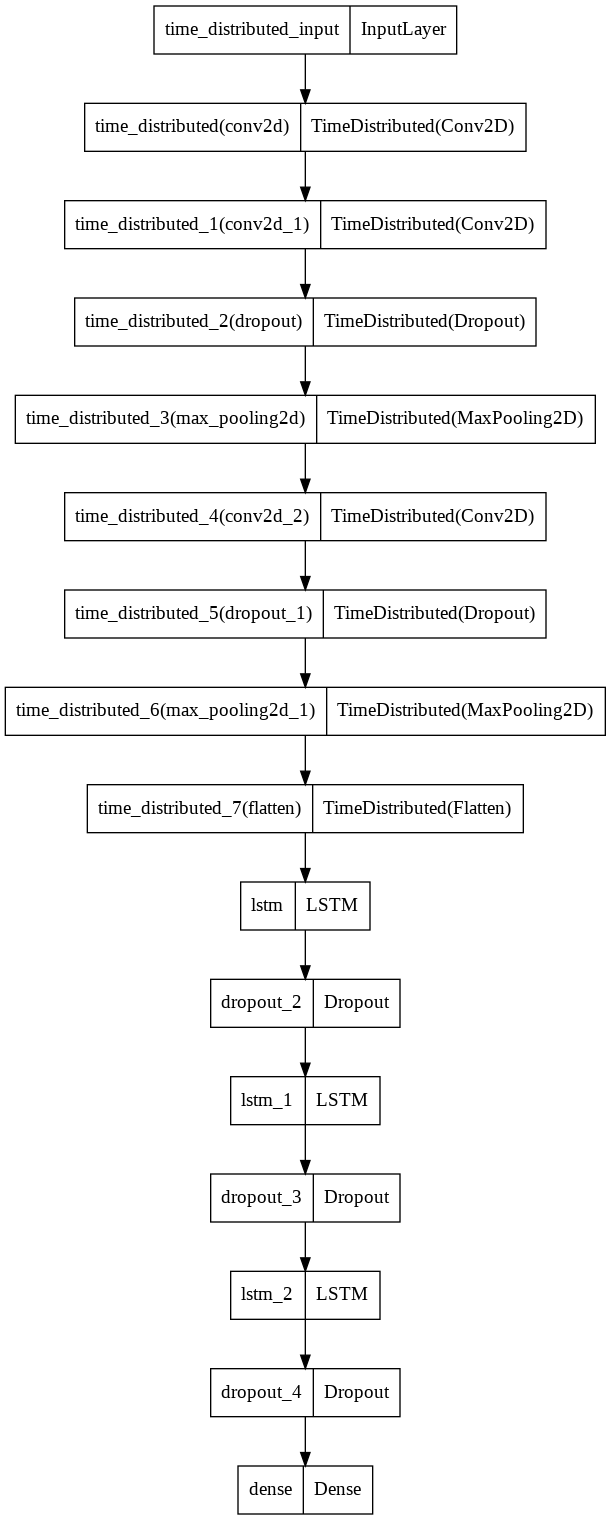

In [ ]:
plot_model(model3)

In [ ]:
history=model3.fit(VariableLengthGenerator(X_train, Y_train, 64,shuffle=True), epochs = 300,
           validation_data=VariableLengthGenerator(X_valid, Y_valid, 1,shuffle=True),callbacks=callbacks)

Epoch 1/300
100/100 [==============================] - ETA: 0s - loss: 2.3632 - accuracy: 0.1020
Epoch 1: val_accuracy improved from -inf to 0.10204, saving model to ./drive/MyDrive/CNN_LSTM_lip_cropped_superpixel_true_RGB3.h5
100/100 [==============================] - 32s 160ms/step - loss: 2.3632 - accuracy: 0.1020 - val_loss: 2.3022 - val_accuracy: 0.1020
Epoch 2/300
100/100 [==============================] - ETA: 0s - loss: 2.2287 - accuracy: 0.1495
Epoch 2: val_accuracy improved from 0.10204 to 0.26531, saving model to ./drive/MyDrive/CNN_LSTM_lip_cropped_superpixel_true_RGB3.h5
100/100 [==============================] - 11s 104ms/step - loss: 2.2287 - accuracy: 0.1495 - val_loss: 2.0220 - val_accuracy: 0.2653
Epoch 3/300
100/100 [==============================] - ETA: 0s - loss: 1.8467 - accuracy: 0.3111
Epoch 3: val_accuracy did not improve from 0.26531
100/100 [==============================] - 10s 100ms/step - loss: 1.8467 - accuracy: 0.3111 - val_loss: 2.0387 - val_accuracy: 

In [ ]:
# temp=tf.keras.models.load_model("./drive/MyDrive/GC_CNN_LSTM_lip_cropped_superpixel_true_RGB2.h5",
#                                 custom_objects={ 'GCRMSprop': optimizer })
temp=tf.keras.models.load_model("./drive/MyDrive/CNN_LSTM_lip_cropped_superpixel_true_RGB3.h5",
                                custom_objects={ 'GCRMSprop': optimizer })
# temp=tf.keras.models.load_model("./drive/MyDrive/model3_53_accuracy.h5")
# temp=tf.keras.models.load_model("./drive/MyDrive/model3_40_accuracy.h5",
#                                 custom_objects={ 'GCRMSprop': optimizer })

In [ ]:
temp.evaluate(VariableLengthGenerator(X_valid, Y_valid, 1,shuffle=True))

98/98 [==============================] - 2s 5ms/step - loss: 1.1767 - accuracy: 0.7755


[1.1766974925994873, 0.7755101919174194]

In [ ]:
temp.evaluate(VariableLengthGenerator(X_test, Y_test, 1,shuffle=True))

100/100 [==============================] - 1s 5ms/step - loss: 2.5455 - accuracy: 0.5700


[2.5454792976379395, 0.5699999928474426]

In [28]:
temp=tf.keras.models.load_model("./drive/MyDrive/model3_57_accuracy.h5",
                                custom_objects={ 'GCRMSprop': optimizer })
print(temp.evaluate(VariableLengthGenerator(X_valid, Y_valid, 1,shuffle=True)))
print(temp.evaluate(VariableLengthGenerator(X_test, Y_test, 1,shuffle=True)))

98/98 [==============================] - 2s 6ms/step - loss: 1.1767 - accuracy: 0.7755
[1.1766974925994873, 0.7755101919174194]
100/100 [==============================] - 1s 6ms/step - loss: 2.5455 - accuracy: 0.5700
[2.5454792976379395, 0.5699999928474426]


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(np.argmax(Y_test,axis=1),np.argmax(temp.predict(VariableLengthGenerator(X_test,Y_test,1,shuffle=False)),axis=1))

array([[4, 0, 0, 3, 3, 0, 0, 0, 0, 0],
       [0, 1, 8, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 8, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 9, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 7, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 9, 0, 0, 1, 0],
       [0, 0, 0, 7, 2, 0, 1, 0, 0, 0],
       [0, 0, 1, 1, 0, 1, 0, 3, 2, 2],
       [0, 0, 0, 0, 1, 0, 1, 0, 8, 0],
       [0, 0, 0, 0, 0, 3, 0, 0, 0, 7]])

In [ ]:
accuracy_score(np.argmax(Y_test,axis=1),np.argmax(temp.predict(VariableLengthGenerator(X_test,Y_test,1,shuffle=False)),axis=1))

0.57

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(np.argmax(Y_valid,axis=1),np.argmax(temp.predict(VariableLengthGenerator(X_valid,Y_valid,1,shuffle=False)),axis=1))

array([[7, 0, 0, 2, 0, 0, 0, 0, 0, 0],
       [0, 7, 2, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 9, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 9, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 2, 7, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 9, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 7, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 6, 1, 2],
       [0, 0, 0, 0, 0, 0, 0, 0, 9, 0],
       [0, 1, 2, 0, 0, 0, 0, 0, 1, 6]])

In [ ]:
accuracy_score(np.argmax(Y_valid,axis=1),np.argmax(temp.predict(VariableLengthGenerator(X_valid,Y_valid,1,shuffle=False)),axis=1))

0.7755102040816326

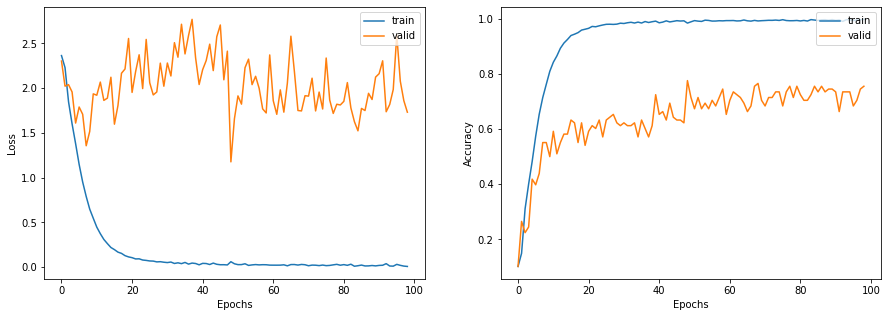

In [ ]:
import matplotlib.pyplot as plt
def display_learning_curves(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.plot(history.history["loss"])
    ax1.plot(history.history["val_loss"])
    ax1.legend(["train", "valid"], loc="upper right")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")

    ax2.plot(history.history["accuracy"])
    ax2.plot(history.history["val_accuracy"])
    ax2.legend(["train", "valid"], loc="upper right")
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Accuracy")
    plt.show()

display_learning_curves(history)

## Graph Convolution Neural Network

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Mar 13 21:33:18 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
# Importing the libraries
import numpy as np

import pandas as pd
import os
import cv2
import h5py
import tensorflow as tf

from keras.layers import TimeDistributed,Flatten
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D


from keras.layers import Dense,LSTM,Dropout
from tensorflow.keras.utils import Sequence


from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


In [4]:
#mounting google drive on colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# !unzip '/content/drive/MyDrive/unseen_augmented_dataset.zip'
!unzip '/content/drive/MyDrive/upscaled_train_test_split_lips.zip'

Streaming output truncated to the last 5000 lines.
  inflating: upscaled_train_test_split_lips/train/08/F06_10/color_009.jpg  
  inflating: upscaled_train_test_split_lips/train/08/F06_10/color_010.jpg  
  inflating: upscaled_train_test_split_lips/train/08/F06_10/color_011.jpg  
  inflating: upscaled_train_test_split_lips/train/08/F06_10/color_012.jpg  
  inflating: upscaled_train_test_split_lips/train/08/F06_10/color_013.jpg  
  inflating: upscaled_train_test_split_lips/train/08/F06_10/color_014.jpg  
  inflating: upscaled_train_test_split_lips/train/08/F06_10/color_015.jpg  
   creating: upscaled_train_test_split_lips/train/08/F07_01/
  inflating: upscaled_train_test_split_lips/train/08/F07_01/color_001.jpg  
  inflating: upscaled_train_test_split_lips/train/08/F07_01/color_002.jpg  
  inflating: upscaled_train_test_split_lips/train/08/F07_01/color_003.jpg  
  inflating: upscaled_train_test_split_lips/train/08/F07_01/color_004.jpg  
  inflating: upscaled_train_test_split_lips/train/08

In [8]:
base_path = "./"
train_df = pd.read_csv(os.path.join(base_path,"drive/MyDrive/train_lip_upscaled.csv"))
test_df = pd.read_csv(os.path.join(base_path,"drive/MyDrive/test_lip_upscaled.csv"))
valid_df = pd.read_csv(os.path.join(base_path,"drive/MyDrive/valid_lip_upscaled.csv"))
# base_path = "./"
# train_df = pd.read_csv(os.path.join(base_path,"drive/MyDrive/unseen_train.csv"))
# test_df = pd.read_csv(os.path.join(base_path,"drive/MyDrive/unseen_test.csv"))
# valid_df = pd.read_csv(os.path.join(base_path,"drive/MyDrive/unseen_valid.csv"))


In [9]:
IMG_SIZE = 90

def load_video(path, data_type ,max_frames=0, resize=(IMG_SIZE, IMG_SIZE)):
    
    instance_class = path[:2]
    instance_name = path[3:]
    
    instance_path = "./upscaled_train_test_split_lips"
    instance_path = os.path.join(instance_path,data_type,instance_class,instance_name)
    
    frames = []
    
    image_file_names=os.listdir(instance_path)
    
    
    for i in image_file_names:
        frame = cv2.imread(os.path.join(instance_path,i))
        ##to make the frame one channel greyscale
        # frame=frame[:,:,0:1]
        frames.append(frame)
    
    
    
    return np.array(frames)

In [10]:
# !unzip "./train_test_split_dataset_resized"

In [11]:
#Main Input for Class
#train_data
X_train= []

video_paths = train_df["VideoName"].values.tolist()

Y_train = np.array(pd.get_dummies(train_df["Label"]))

for path in video_paths:
    X_train.append(load_video(path,"train"))

#valid_data    
X_valid = []

video_paths = valid_df["VideoName"].values.tolist()

Y_valid = np.array(pd.get_dummies(valid_df["Label"]))

for path in video_paths:
    X_valid.append(load_video(path,"validation"))
    
#test_data
X_test = []

video_paths = test_df["VideoName"].values.tolist()

Y_test = np.array(pd.get_dummies(test_df["Label"]))

for path in video_paths:
    X_test.append(load_video(path,"test"))

In [12]:
##Train Data Shape
print(len(X_train),Y_train.shape)
print(len(X_valid),Y_valid.shape)

1290 (1290, 10)
98 (98, 10)


In [13]:
X_train[1].shape

(6, 40, 60, 3)

In [14]:
# Recurrent Neural Network

# Part 2 - Building the RNN

class VariableLengthGenerator(Sequence):
  """Implements an efficient variable-length batch generator.
    The value of Time step dimension is calculated accroding to the longest sequence 
    in each batch.
  """
  def __init__(self, X, Y, batch_size, shuffle=False):
    """
    the class instructor.
    Args:
      X (list[list[int/float]]): A sequence input data
      Y (np.ndarray): target array
      batch_size (int): Pre-defined batch size
      shuffle (boolean): Enable dataset shuffling after each epoch
    """
    ########################################
    self.X=X
    self.Y=Y
    self.batch_size=batch_size
    self.shuffle=shuffle
    self.indexes = np.arange(len(self.X))
    ########################################
    
  
  def __len__(self):
    """
    Denotes the number of batches per epoch
    Returns:
      len (int): number of batches per epoch
    """
    ########################################
    return int(np.floor(len(self.X) / self.batch_size))
    ########################################
    
  
  def __getitem__(self, idx):
    """
    Generate idx-th batch of dataset.
    
    Args:
      idx (int): the batch index
      
    Returns:
      A tuple: (
        input batch (numpy.array(shape=[batch_size, batch_max_len])),
        target batch (numpu.array(shape=[batch_size, num_classes], dtype=np.int))
      )
      
    Hint: First find the sentence with the maximum length within the batch (batch_max_len). 
      then pad any other sentence with zero to match up with the batch_max_len
    """
    indexes = self.indexes[idx * self.batch_size:(idx + 1) * self.batch_size]    
      
    x=[self.X[i] for i in indexes]
    y=self.Y[indexes]
    #x = pad_sequences(x, value=0.0,dtype='float', padding='pre')
    
    ##Padding with 90x90 
    max_length = 0

    for elem in x:
        max_length = max(max_length,len(elem))
    
    final_array = []
    

    for elem in x:
        elem_length = len(elem)
        #print(elem_length)
        temp_array = []
        if elem_length<max_length:

            for i in range(0,max_length - elem_length):
                temp_array.append(np.zeros((40,60,3)))

        for g in range(0,len(elem)):


            temp_array.append(elem[g])

        final_array.append(temp_array)
    
    final_array = np.array(final_array)/255
    
    
    
    return (final_array, y)

  def on_epoch_end(self):
    """
    This method is called after each epoch,
      you can use it to shuffle dataset on every epoch.
    """
    ########################################
    if self.shuffle:
        np.random.shuffle(self.indexes)


In [15]:
from tensorflow.keras.utils import plot_model

In [16]:
from tensorflow.keras.optimizers import RMSprop
class GCRMSprop(RMSprop):
    def get_gradients(self, loss, params):
        # We here just provide a modified get_gradients() function since we are
        # trying to just compute the centralized gradients.

        grads = []
        gradients = super().get_gradients()
        for grad in gradients:
            grad_len = len(grad.shape)
            if grad_len > 1:
                axis = list(range(grad_len - 1))
                grad -= tf.reduce_mean(grad, axis=axis, keep_dims=True)
            grads.append(grad)

        return grads


optimizer = GCRMSprop(learning_rate=0.01)

In [17]:
# temp=tf.keras.models.load_model("./drive/MyDrive/GC_CNN_LSTM_lip_cropped_superpixel_true_RGB2.h5",
#                                 custom_objects={ 'GCRMSprop': optimizer })
# temp=tf.keras.models.load_model("./drive/MyDrive/CNN_LSTM_lip_cropped_superpixel_true_RGB2.h5")
temp=tf.keras.models.load_model("./drive/MyDrive/model3_57_accuracy.h5",
                                custom_objects={ 'GCRMSprop': optimizer })
# temp=tf.keras.models.load_model("./drive/MyDrive/model3_53_accuracy.h5")


In [18]:
temp.evaluate(VariableLengthGenerator(X_valid, Y_valid, 1,shuffle=True))

98/98 [==============================] - 12s 7ms/step - loss: 1.1767 - accuracy: 0.7755


[1.1766974925994873, 0.7755101919174194]

In [19]:
temp.evaluate(VariableLengthGenerator(X_test, Y_test, 1,shuffle=True))

100/100 [==============================] - 1s 5ms/step - loss: 2.5455 - accuracy: 0.5700


[2.5454792976379395, 0.5699999928474426]

In [20]:
for layer in temp.layers:
  print(layer.name,end=",")

time_distributed,time_distributed_1,time_distributed_2,time_distributed_3,time_distributed_4,time_distributed_5,time_distributed_6,time_distributed_7,lstm,dropout_2,lstm_1,dropout_3,lstm_2,dropout_4,dense,

In [21]:
last_layer = tf.keras.models.Model(inputs=temp.input, outputs=temp.get_layer('lstm_2').output)

In [22]:
"""df_train=np.vstack([last_layer.predict(VariableLengthGenerator(X_train, Y_train,1,shuffle=True)),
                    last_layer.predict(VariableLengthGenerator(X_valid, Y_valid,1,shuffle=True))])
# df_valid=last_layer.predict(VariableLengthGenerator(X_valid, Y_valid,1,shuffle=True))
df_test=last_layer.predict(VariableLengthGenerator(X_test, Y_test,1,shuffle=True))
y_train=np.vstack([Y_train,Y_valid])
y_test=np.vstack([''])
"""
train_data=np.vstack([last_layer.predict(VariableLengthGenerator(X_train, Y_train,1,shuffle=True)),
                                 last_layer.predict(VariableLengthGenerator(X_valid, Y_valid,1,shuffle=True))])

test_data=last_layer.predict(VariableLengthGenerator(X_test, Y_test,1,shuffle=True))
train_data=pd.DataFrame(train_data)
test_data=pd.DataFrame(test_data)

In [23]:
print(train_data.shape)
print(test_data.shape)

(1388, 100)
(100, 100)


In [24]:
train_data['paper_id']=np.arange(train_data.shape[0])
train_data['subject']=np.vstack([np.argmax(Y_train,axis=1)[:,None],np.argmax(Y_valid,axis=1)[:,None]])

test_data['paper_id']=train_data.shape[0]+np.arange(test_data.shape[0])
test_data['subject']=np.argmax(Y_test,axis=1)[:,None]

In [25]:
video_dataset=pd.concat([train_data,test_data],axis=0).reset_index(drop=True)

In [26]:
video_dataset

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,paper_id,subject
0,0.674702,0.344443,0.484485,0.089814,0.453974,0.503805,0.489370,-0.051071,0.403703,-0.423029,...,-0.878300,-0.046369,0.786033,-0.131620,-0.017463,-0.939371,0.813321,0.229143,0,0
1,0.606730,-0.396119,-0.790350,0.201717,-0.170381,0.465199,0.441040,-0.016337,-0.267708,-0.548015,...,-0.689972,0.792547,0.694459,-0.034963,-0.063721,-0.777450,-0.723347,-0.357903,1,0
2,0.675349,-0.467618,-0.851819,0.135805,0.614080,0.167583,0.569155,-0.106215,-0.351247,-0.498395,...,-0.735188,0.739933,0.900237,-0.006782,-0.097394,-0.699664,-0.364914,-0.427487,2,0
3,0.690422,-0.631588,-0.831008,0.249769,0.070849,0.279782,0.583201,-0.115932,-0.236583,-0.517095,...,-0.666178,0.806424,0.765902,0.001969,-0.083292,-0.753977,-0.621086,-0.441049,3,0
4,0.399018,-0.500957,-0.785585,0.056734,-0.224801,0.303189,0.305394,-0.092891,-0.148175,-0.577259,...,-0.344610,0.770706,0.587428,-0.008949,-0.096372,-0.545348,-0.428909,-0.203304,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483,0.075205,0.312613,0.108461,-0.192761,-0.113596,0.567660,0.009073,0.031498,0.859812,-0.275778,...,0.396353,-0.170615,-0.154617,-0.752258,0.955083,-0.095433,0.453745,0.164821,1483,9
1484,0.445894,-0.001007,0.002436,-0.525711,-0.063584,0.004271,-0.196068,0.296285,0.656133,0.139364,...,0.473268,-0.158740,-0.295497,0.046843,0.983547,0.297600,0.282417,-0.729063,1484,9
1485,0.559141,-0.022121,0.005166,-0.015856,0.603436,0.420956,0.103410,0.251491,0.790531,0.178304,...,0.841076,-0.029499,-0.298508,-0.674383,0.893729,0.194018,0.435909,-0.797526,1485,9
1486,0.041920,0.944498,0.795576,-0.518282,-0.642878,0.848221,0.378149,-0.223284,0.703576,-0.733240,...,-0.424378,-0.336072,0.027985,-0.651015,0.145742,-0.765024,0.843610,0.729498,1486,9


In [27]:
import numpy as np
import tqdm

In [28]:
def calculate_euclidean(x,y):
  return(np.linalg.norm(x - y))

In [29]:
sum=0
c=0
for i in tqdm.tqdm(range(video_dataset.shape[0])):
  for j in range(i+1,video_dataset.shape[0]):
    sum=sum+calculate_euclidean(video_dataset.iloc[i,0:100],video_dataset.iloc[j,0:100])
    c=c+1

100%|██████████| 1488/1488 [12:11<00:00,  2.04it/s]


In [30]:
avg_euclidean_dist=sum/c

In [31]:
avg_euclidean_dist

7.742825119872565

In [32]:
from csv import writer
for i in tqdm.tqdm(range(video_dataset.shape[0])):
  for j in range(video_dataset.shape[0]):
    if(i!=j):
      dist=calculate_euclidean(video_dataset.iloc[i,0:100],video_dataset.iloc[j,0:100])
      if(dist<=avg_euclidean_dist):
        pair=[i,j,dist]
        with open('event_with_dist_57_baseline.csv', 'a') as f_object:
          writer_object = writer(f_object)
          writer_object.writerow(pair)
          f_object.close()

100%|██████████| 1488/1488 [23:47<00:00,  1.04it/s]


In [33]:
citations=pd.read_csv('event_with_dist_57_baseline.csv',header=None)

In [34]:
citations.columns=['target','source','dist']
citations['dist']=1/citations['dist']
citations

,target,source,dist
0,0,1,0.227927
1,0,2,0.234873
2,0,3,0.220295
3,0,4,0.205824
4,0,5,0.299013
...,...,...,...
790329,1487,1482,0.208085
790330,1487,1483,0.349686
790331,1487,1484,0.181175
790332,1487,1485,0.179757


In [35]:
edge_weights=list(citations['dist'])

In [36]:
edge_weights=tf.convert_to_tensor(edge_weights)

In [37]:
edge_weights

<tf.Tensor: shape=(790334,), dtype=float32, numpy=
array([0.22792684, 0.23487301, 0.2202951 , ..., 0.18117522, 0.17975657,
       0.35878944], dtype=float32)>

In [38]:
type(edge_weights)

tensorflow.python.framework.ops.EagerTensor

In [39]:
citations=citations.drop(columns=['dist'])
citations

,target,source
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
790329,1487,1482
790330,1487,1483
790331,1487,1484
790332,1487,1485


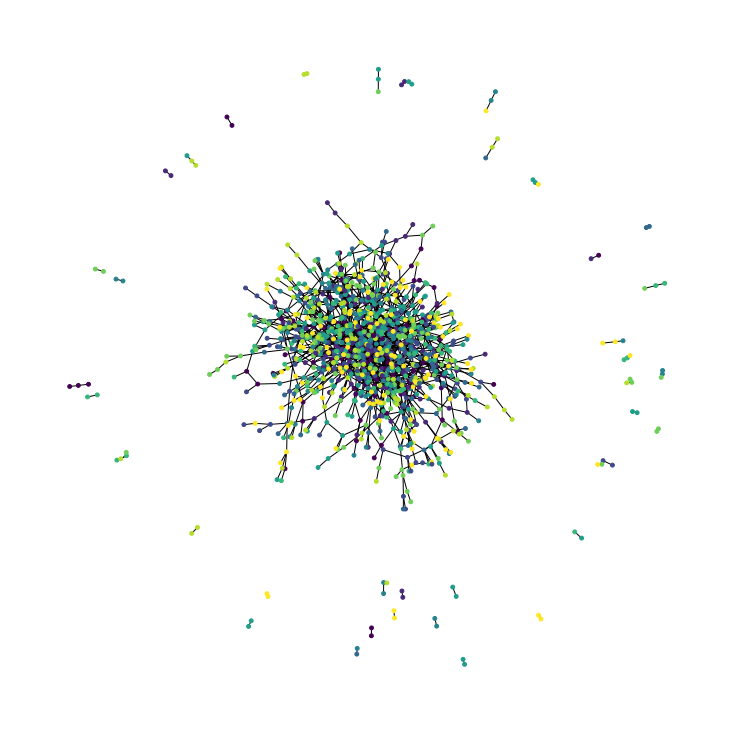

In [40]:
import networkx as nx
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
colors = video_dataset["subject"].tolist()
cora_graph = nx.from_pandas_edgelist(citations.sample(n=1500))
subjects = list(video_dataset[video_dataset["paper_id"].isin(list(cora_graph.nodes))]["subject"])
nx.draw_spring(cora_graph, node_size=15, node_color=subjects)


In [92]:
hidden_units = [32,32]
learning_rate = 0.1
dropout_rate = 0.2
num_epochs = 300
batch_size = 256

In [93]:
from tensorflow.keras.optimizers import RMSprop
class GCRMSprop(RMSprop):
    def get_gradients(self, loss, params):
        # We here just provide a modified get_gradients() function since we are
        # trying to just compute the centralized gradients.

        grads = []
        gradients = super().get_gradients()
        for grad in gradients:
            grad_len = len(grad.shape)
            if grad_len > 1:
                axis = list(range(grad_len - 1))
                grad -= tf.reduce_mean(grad, axis=axis, keep_dims=True)
            grads.append(grad)

        return grads


optimizer = GCRMSprop(learning_rate=learning_rate)

In [94]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor = 'val_acc', factor = 0.1, patience = 20, verbose = 1,min_lr=1e-3, min_delta = 0)

def run_experiment(model, x_train, y_train):
    # Compile the model.
    model.compile(
        optimizer=optimizer,
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        # loss='categorical_crossentropy',
        metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name="acc")],
        # metrics=[tf.keras.metrics.Accuracy(name="acc")],
    )
    # Create an early stopping callback.
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor="val_acc", patience=50, restore_best_weights=True,verbose=1
    )
    # Fit the model.
    history = model.fit(
        x=x_train,
        y=y_train,
        epochs=num_epochs,
        batch_size=batch_size,
        validation_split=0.07,
        callbacks=[early_stopping,
                   reduce_lr
                   ],
    )

    return history


In [95]:

def display_learning_curves(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.plot(history.history["loss"])
    ax1.plot(history.history["val_loss"])
    ax1.legend(["train", "valid"], loc="upper right")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")

    ax2.plot(history.history["acc"])
    ax2.plot(history.history["val_acc"])
    ax2.legend(["train", "valid"], loc="upper right")
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Accuracy")
    plt.show()


In [96]:
from tensorflow.keras import regularizers
regularization_factor=1e-3
def create_ffn(hidden_units, dropout_rate, name=None):
    fnn_layers = []

    for units in hidden_units:
        fnn_layers.append(tf.keras.layers.BatchNormalization())
        fnn_layers.append(tf.keras.layers.Dropout(dropout_rate))
        fnn_layers.append(tf.keras.layers.Dense(units, activation=tf.nn.gelu,
    #                       kernel_regularizer=regularizers.l1_l2(l1=regularization_factor, l2=regularization_factor),
    # bias_regularizer=regularizers.l2(regularization_factor),
    # activity_regularizer=regularizers.l2(regularization_factor)
    ))

    return tf.keras.Sequential(fnn_layers, name=name)


In [47]:
feature_names = set(video_dataset.columns) - {"paper_id", "subject"}
num_features = len(feature_names)
class_values = sorted(video_dataset["subject"].unique())
class_idx = {name: id for id, name in enumerate(class_values)}
paper_idx = {name: idx for idx, name in enumerate(sorted(video_dataset["paper_id"].unique()))}
num_classes = len(class_idx)

# Create train and test features as a numpy array.
x_train = train_data[feature_names].to_numpy()
x_test = test_data[feature_names].to_numpy()
# Create train and test targets as a numpy array.
y_train = train_data["subject"]
y_test = test_data["subject"]

In [48]:

def create_baseline_model(hidden_units, num_classes, dropout_rate=0.2):
    inputs = tf.keras.layers.Input(shape=(num_features,), name="input_features")
    x = create_ffn(hidden_units, dropout_rate, name=f"ffn_block1")(inputs)
    for block_idx in range(4):
        # Create an FFN block.
        x1 = create_ffn(hidden_units, dropout_rate, name=f"ffn_block{block_idx + 2}")(x)
        # Add skip connection.
        x = tf.keras.layers.Add(name=f"skip_connection{block_idx + 2}")([x, x1])
    # Compute logits.
    logits = tf.keras.layers.Dense(num_classes, name="logits")(x)
    # Create the model.
    return tf.keras.Model(inputs=inputs, outputs=logits, name="baseline")


baseline_model = create_baseline_model(hidden_units, num_classes, dropout_rate)
baseline_model.summary()

Model: "baseline"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_features (InputLayer)    [(None, 100)]        0           []                               
                                                                                                  
 ffn_block1 (Sequential)        (None, 32)           4816        ['input_features[0][0]']         
                                                                                                  
 ffn_block2 (Sequential)        (None, 32)           2368        ['ffn_block1[0][0]']             
                                                                                                  
 skip_connection2 (Add)         (None, 32)           0           ['ffn_block1[0][0]',             
                                                                  'ffn_block2[0][0]']      

In [49]:
history = run_experiment(baseline_model, x_train, y_train)

Epoch 1/300
6/6 [==============================] - 6s 96ms/step - loss: 1.8127 - acc: 0.5326 - val_loss: 1.1773 - val_acc: 0.7347
Epoch 2/300
6/6 [==============================] - 0s 16ms/step - loss: 0.4007 - acc: 0.8884 - val_loss: 1.3056 - val_acc: 0.7245
Epoch 3/300
6/6 [==============================] - 0s 18ms/step - loss: 0.3883 - acc: 0.8946 - val_loss: 1.0779 - val_acc: 0.8163
Epoch 4/300
6/6 [==============================] - 0s 16ms/step - loss: 0.3184 - acc: 0.9093 - val_loss: 1.0615 - val_acc: 0.7551
Epoch 5/300
6/6 [==============================] - 0s 16ms/step - loss: 0.2541 - acc: 0.9326 - val_loss: 1.0876 - val_acc: 0.8061
Epoch 6/300
6/6 [==============================] - 0s 15ms/step - loss: 0.2392 - acc: 0.9310 - val_loss: 1.1766 - val_acc: 0.7857
Epoch 7/300
6/6 [==============================] - 0s 17ms/step - loss: 0.1896 - acc: 0.9543 - val_loss: 1.2692 - val_acc: 0.7449
Epoch 8/300
6/6 [==============================] - 0s 16ms/step - loss: 0.2831 - acc: 0.92

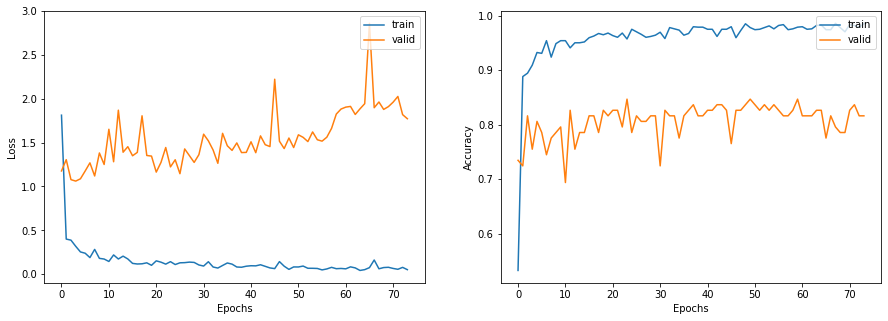

In [50]:
display_learning_curves(history)

In [51]:
_, test_accuracy = baseline_model.evaluate(x=x_test, y=y_test, verbose=0)
print(f"Test accuracy: {round(test_accuracy * 100, 2)}%")

Test accuracy: 58.0%


In [52]:
# Create an edges array (sparse adjacency matrix) of shape [2, num_edges].
edges = citations[["source", "target"]].to_numpy().T
# Create an edge weights array of ones.
# edge_weights = tf.ones(shape=edges.shape[1]) # already created
# Create a node features array of shape [num_nodes, num_features].
node_features = tf.cast(
    video_dataset.sort_values("paper_id")[feature_names].to_numpy(), dtype=tf.dtypes.float32
)
# Create graph info tuple with node_features, edges, and edge_weights.
graph_info = (node_features, edges, edge_weights)

print("Edges shape:", edges.shape)
print("Nodes shape:", node_features.shape)

Edges shape: (2, 790334)
Nodes shape: (1488, 100)


In [53]:
edges

array([[   1,    2,    3, ..., 1484, 1485, 1486],
       [   0,    0,    0, ..., 1487, 1487, 1487]])

In [54]:
node_features

<tf.Tensor: shape=(1488, 100), dtype=float32, numpy=
array([[ 0.67470217,  0.34444347,  0.48448515, ..., -0.9393711 ,
         0.81332123,  0.22914332],
       [ 0.6067298 , -0.39611873, -0.7903501 , ..., -0.7774503 ,
        -0.723347  , -0.3579032 ],
       [ 0.6753492 , -0.46761757, -0.8518186 , ..., -0.69966376,
        -0.36491355, -0.42748725],
       ...,
       [ 0.55914086, -0.02212103,  0.00516582, ...,  0.19401777,
         0.43590903, -0.7975255 ],
       [ 0.04191972,  0.94449764,  0.7955763 , ..., -0.7650239 ,
         0.8436095 ,  0.7294983 ],
       [ 0.03322746,  0.7079116 ,  0.38681284, ..., -0.46776843,
         0.3838476 ,  0.5669135 ]], dtype=float32)>

In [55]:

class GraphConvLayer(tf.keras.layers.Layer):
    def __init__(
        self,
        hidden_units,
        dropout_rate=0.2,
        aggregation_type="mean",
        combination_type="concat",
        normalize=False,
        *args,
        **kwargs,
    ):
        super(GraphConvLayer, self).__init__(*args, **kwargs)

        self.aggregation_type = aggregation_type
        self.combination_type = combination_type
        self.normalize = normalize

        self.ffn_prepare = create_ffn(hidden_units, dropout_rate)
        if self.combination_type == "gated":
            self.update_fn = tf.keras.layers.GRU(
                units=hidden_units,
                activation="tanh",
                recurrent_activation="sigmoid",
                dropout=dropout_rate,
                return_state=True,
                recurrent_dropout=dropout_rate,
            )
        else:
            self.update_fn = create_ffn(hidden_units, dropout_rate)

    def prepare(self, node_repesentations, weights=None):
        # node_repesentations shape is [num_edges, embedding_dim].
        messages = self.ffn_prepare(node_repesentations)
        if weights is not None:
            messages = messages * tf.expand_dims(weights, -1)
        return messages

    def aggregate(self, node_indices, neighbour_messages):
        # node_indices shape is [num_edges].
        # neighbour_messages shape: [num_edges, representation_dim].
        num_nodes = tf.math.reduce_max(node_indices) + 1
        if self.aggregation_type == "sum":
            aggregated_message = tf.math.unsorted_segment_sum(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        elif self.aggregation_type == "mean":
            aggregated_message = tf.math.unsorted_segment_mean(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        elif self.aggregation_type == "max":
            aggregated_message = tf.math.unsorted_segment_max(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        else:
            raise ValueError(f"Invalid aggregation type: {self.aggregation_type}.")

        return aggregated_message

    def update(self, node_repesentations, aggregated_messages):
        # node_repesentations shape is [num_nodes, representation_dim].
        # aggregated_messages shape is [num_nodes, representation_dim].
        if self.combination_type == "gru":
            # Create a sequence of two elements for the GRU layer.
            h = tf.stack([node_repesentations, aggregated_messages], axis=1)
        elif self.combination_type == "concat":
            # Concatenate the node_repesentations and aggregated_messages.
            h = tf.concat([node_repesentations, aggregated_messages], axis=1)
        elif self.combination_type == "add":
            # Add node_repesentations and aggregated_messages.
            h = node_repesentations + aggregated_messages
        else:
            raise ValueError(f"Invalid combination type: {self.combination_type}.")

        # Apply the processing function.
        node_embeddings = self.update_fn(h)
        if self.combination_type == "gru":
            node_embeddings = tf.unstack(node_embeddings, axis=1)[-1]

        if self.normalize:
            node_embeddings = tf.nn.l2_normalize(node_embeddings, axis=-1)
        return node_embeddings

    def call(self, inputs):
        """Process the inputs to produce the node_embeddings.

        inputs: a tuple of three elements: node_repesentations, edges, edge_weights.
        Returns: node_embeddings of shape [num_nodes, representation_dim].
        """

        node_repesentations, edges, edge_weights = inputs
        # Get node_indices (source) and neighbour_indices (target) from edges.
        node_indices, neighbour_indices = edges[0], edges[1]
        # neighbour_repesentations shape is [num_edges, representation_dim].
        neighbour_repesentations = tf.gather(node_repesentations, neighbour_indices)

        # Prepare the messages of the neighbours.
        neighbour_messages = self.prepare(neighbour_repesentations, edge_weights)
        # Aggregate the neighbour messages.
        aggregated_messages = self.aggregate(node_indices, neighbour_messages)
        # Update the node embedding with the neighbour messages.
        return self.update(node_repesentations, aggregated_messages)


In [56]:

class GNNNodeClassifier(tf.keras.Model):
    def __init__(
        self,
        graph_info,
        num_classes,
        hidden_units,
        aggregation_type="sum",
        combination_type="concat",
        dropout_rate=0.2,
        normalize=True,
        *args,
        **kwargs,
    ):
        super(GNNNodeClassifier, self).__init__(*args, **kwargs)

        # Unpack graph_info to three elements: node_features, edges, and edge_weight.
        node_features, edges, edge_weights = graph_info
        self.node_features = node_features
        self.edges = edges
        self.edge_weights = edge_weights
        # Set edge_weights to ones if not provided.
        if self.edge_weights is None:
            self.edge_weights = tf.ones(shape=edges.shape[1])
        # Scale edge_weights to sum to 1.
        self.edge_weights = self.edge_weights / tf.math.reduce_sum(self.edge_weights)

        # Create a process layer.
        self.preprocess = create_ffn(hidden_units, dropout_rate, name="preprocess")
        # Create the first GraphConv layer.
        self.conv1 = GraphConvLayer(
            hidden_units,
            dropout_rate,
            aggregation_type,
            combination_type,
            normalize,
            name="graph_conv1",
        )
        # Create the second GraphConv layer.
        self.conv2 = GraphConvLayer(
            hidden_units,
            dropout_rate,
            aggregation_type,
            combination_type,
            normalize,
            name="graph_conv2",
        )
        
        # Create a postprocess layer.
        self.postprocess = create_ffn(hidden_units, dropout_rate, name="postprocess")
        # Create a compute logits layer.
        self.compute_logits = tf.keras.layers.Dense(units=num_classes, name="logits")

    def call(self, input_node_indices):
        # Preprocess the node_features to produce node representations.
        x = self.preprocess(self.node_features)
        # Apply the first graph conv layer.
        x1 = self.conv1((x, self.edges, self.edge_weights))
        # Skip connection.
        x = x1 + x
        # Apply the second graph conv layer.
        x2 = self.conv2((x, self.edges, self.edge_weights))
        # Skip connection.
        x = x2 + x
        # Postprocess node embedding.
        x = self.postprocess(x)
        # Fetch node embeddings for the input node_indices.
        node_embeddings = tf.gather(x, input_node_indices)
        # Compute logits
        return self.compute_logits(node_embeddings)


In [97]:
gnn_model = GNNNodeClassifier(
    graph_info=graph_info,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    aggregation_type="mean",
    combination_type="concat",
    name="gnn_model",
)

print("GNN output shape:", gnn_model([1, 10, 100]))

gnn_model.summary()

GNN output shape: tf.Tensor(
[[-0.09788627 -0.14456254 -0.07473482  0.2140987  -0.16331111 -0.03922698
  -0.2590344  -0.01342428  0.18432389  0.05893104]
 [-0.08361484 -0.10542469 -0.06263295  0.20275007 -0.10623761 -0.07680514
  -0.2122496  -0.02272837  0.18937188  0.08361188]
 [-0.08389083 -0.00986295 -0.03862994  0.04125721 -0.04463682  0.11359477
  -0.05456427  0.01651732  0.04302387  0.01605268]], shape=(3, 10), dtype=float32)
Model: "gnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 preprocess (Sequential)     (1488, 32)                4816      
                                                                 
 graph_conv1 (GraphConvLayer  multiple                 5888      
 )                                                               
                                                                 
 graph_conv2 (GraphConvLayer  multiple                 5888      
 )               

In [98]:
x_train = train_data.paper_id.to_numpy()
history = run_experiment(gnn_model, x_train, y_train)

Epoch 1/300
6/6 [==============================] - 7s 299ms/step - loss: 3.2743 - acc: 0.1930 - val_loss: 49.9830 - val_acc: 0.3878 - lr: 0.1000
Epoch 2/300
6/6 [==============================] - 1s 122ms/step - loss: 2.0044 - acc: 0.3450 - val_loss: 17.3463 - val_acc: 0.3878 - lr: 0.1000
Epoch 3/300
6/6 [==============================] - 1s 122ms/step - loss: 1.1890 - acc: 0.5814 - val_loss: 23.1689 - val_acc: 0.3878 - lr: 0.1000
Epoch 4/300
6/6 [==============================] - 1s 125ms/step - loss: 1.2806 - acc: 0.6062 - val_loss: 11.9519 - val_acc: 0.4082 - lr: 0.1000
Epoch 5/300
6/6 [==============================] - 1s 125ms/step - loss: 1.4741 - acc: 0.6023 - val_loss: 17.9455 - val_acc: 0.5000 - lr: 0.1000
Epoch 6/300
6/6 [==============================] - 1s 125ms/step - loss: 1.0117 - acc: 0.6938 - val_loss: 5.4982 - val_acc: 0.6020 - lr: 0.1000
Epoch 7/300
6/6 [==============================] - 1s 124ms/step - loss: 0.6611 - acc: 0.7721 - val_loss: 4.4334 - val_acc: 0.6633 

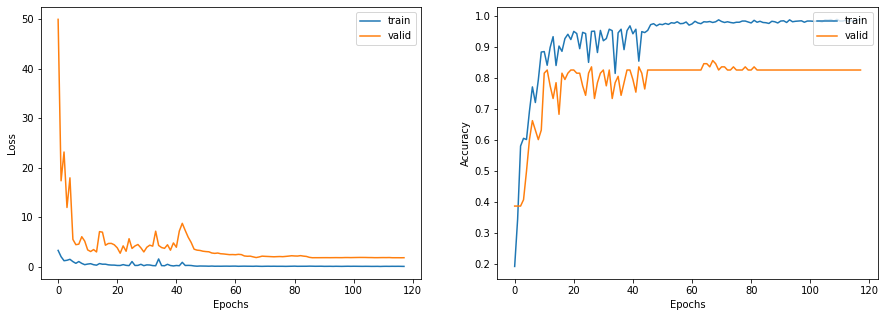

In [99]:
display_learning_curves(history)

In [100]:
x_test = test_data.paper_id.to_numpy()
_, test_accuracy = gnn_model.evaluate(x=x_test, y=y_test, verbose=0)
print(f"Test accuracy: {round(test_accuracy * 100, 2)}%")

Test accuracy: 64.0%


In [101]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,np.argmax(gnn_model.predict(x_test),axis=1))

array([[ 7,  0,  0,  0,  3,  0,  0,  0,  0,  0],
       [ 0,  3,  7,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  9,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  4,  6,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 10,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  9,  0,  0,  0,  1],
       [ 1,  0,  0,  3,  3,  0,  3,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  2,  0,  4,  2,  1],
       [ 0,  0,  0,  0,  1,  0,  1,  0,  8,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  1,  7]])

In [109]:
_, valid_accuracy = gnn_model.evaluate(x=x_train[-98:], y=y_train[-98:], verbose=0)
print(f"Valid accuracy: {round(valid_accuracy * 100, 2)}%")

Valid accuracy: 85.71%


In [110]:
from collections import Counter
Counter(y_train[-98:])

Counter({0: 9, 1: 10, 2: 10, 3: 10, 4: 10, 5: 10, 6: 10, 7: 10, 8: 9, 9: 10})

In [111]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train[-98:],np.argmax(gnn_model.predict(x_train[-98:]),axis=1))

array([[ 9,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 10,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  9,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  9,  0,  1,  0,  0,  0,  0],
       [ 2,  0,  0,  1,  7,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  9,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  9,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  2,  8,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  8,  0],
       [ 0,  1,  1,  0,  0,  0,  0,  1,  1,  6]])

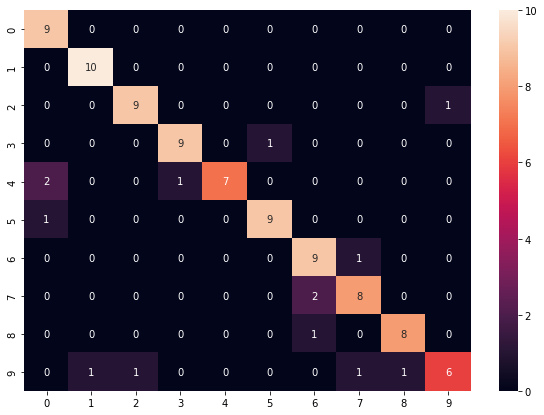

In [116]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix(y_train[-98:],np.argmax(gnn_model.predict(x_train[-98:]),axis=1)), annot=True)


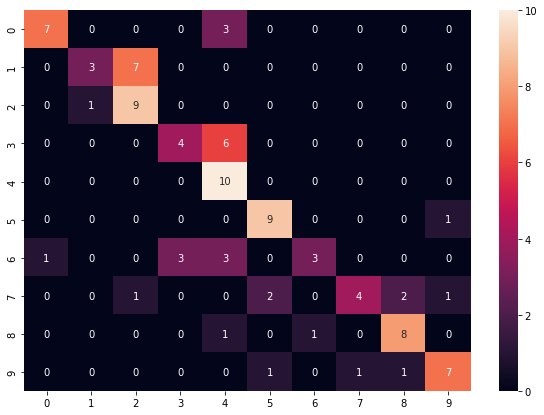

In [113]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix(y_test,np.argmax(gnn_model.predict(x_test),axis=1)), annot=True)